In [1]:
from ultralytics import YOLO

# Load a model
from dataset_emotic import DatasetEmotic
detection_model = YOLO("weights_yolo.pt")  # load an official model

# Predict with the model

In [2]:
import matplotlib.pyplot as plt
def plot_results(results):
    """
    Plots the results from YOLO inference.

    Args:
        results: YOLO results object returned from the model inference.
    """
    # Iterate over the results
    for result in results:
        # Retrieve image and boxes
        img = result.orig_img  # Original image
        annotated_img = result.plot()  # Image with bounding boxes drawn

        # Plot the image
        plt.figure(figsize=(10, 10))
        plt.imshow(annotated_img)
        plt.axis("off")
        plt.title("YOLO Inference Results")
        plt.show()


0: 224x224 2 persons, 5 wine glasss, 2 cups, 1 spoon, 1 bowl, 1 dining table, 1 cell phone, 16.8ms
Speed: 4.7ms preprocess, 16.8ms inference, 384.8ms postprocess per image at shape (1, 3, 224, 224)


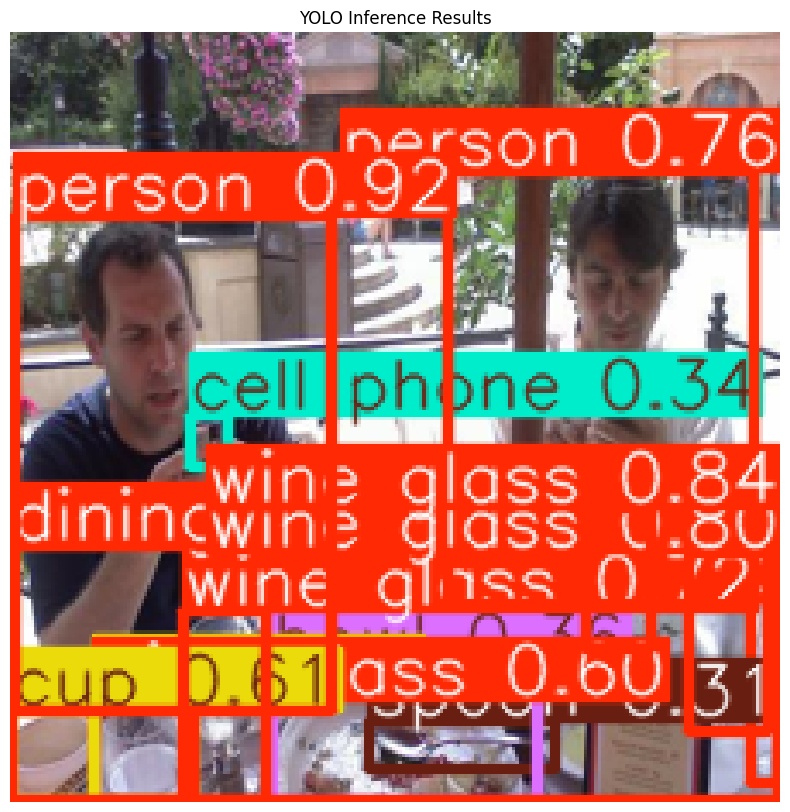

In [3]:

dataset_test = DatasetEmotic(dataset_type="test", subset_dim=32) 
for i, (imagine, _, _) in enumerate(dataset_test):
    imagine = dataset_test[20][0]
    predictie_yolo = detection_model(imagine, imgsz=224)
    # print(predictie_yolo)
    plot_results(predictie_yolo)
    break

In [12]:
predictie_yolo[0].boxes
person_boxes = []
for box in predictie_yolo[0].boxes:
    if int(box.cls.item()) == 0 and box.conf.item() > 0.50:
        person_boxes.append(box.xyxy[0].to("cpu", dtype=int).tolist())
print(person_boxes)
print(len(person_boxes))

[[1, 53, 93, 197], [127, 40, 216, 166]]
2


TypeError: Invalid shape (3, 224, 224) for image data

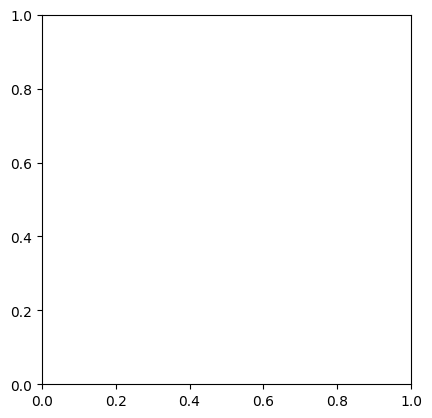

In [15]:
from torchvision import transforms
for img in person_boxes:
    x_min, y_min, x_max, y_max = img
    cropped_img = imagine[y_min:y_max, x_min:x_max]
    transforms = transforms.Compose([
            transforms.ToTensor(),
            transforms.Resize((224, 224)),
        ])
    plt.imshow(transforms(cropped_img))